In [1]:
from keras.models import Sequential
from keras.layers import Activation,Dense,Conv2D,MaxPooling2D,UpSampling2D,Flatten,Reshape
from IPython.display import Image, SVG
from keras.utils.vis_utils import model_to_dot
import numpy as np

Using TensorFlow backend.
/home/arpan/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/arpan/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/arpan/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/arpan/anaconda3/lib/python3.6/site-packages/tensorflo

In [2]:
mnist= np.load('mnist.npz')

In [3]:
mnist.files

['x_test', 'x_train', 'y_train', 'y_test']

In [4]:
x_train,x_test=mnist['x_train'],mnist['x_test']

In [5]:
# normalize the data
max_value_mnsit= float(x_train.max())
x_train = x_train.astype('float32')/max_value_mnsit
x_test = x_test.astype('float32')/max_value_mnsit


In [6]:
# reshape the data
x_train= x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[1],1)
x_test= x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[1],1)

In [7]:
# simple autoencoder
input_dim= x_train.shape[1]
encoded_dim =32
compress_factor = float(input_dim/ encoded_dim)

print("compress factor is {}".format(compress_factor))

compress factor is 0.875


In [8]:
auto_encoder = Sequential()


auto_encoder.add(Conv2D(32,(3,3), activation='relu',padding='same',input_shape=x_train.shape[1:]))
auto_encoder.add(MaxPooling2D(pool_size=(2,2)))
auto_encoder.add(Conv2D(32,(3,3),activation='relu',padding='same'))
auto_encoder.add(MaxPooling2D(pool_size=(2,2)))


auto_encoder.add(Conv2D(32,(3,3),activation='relu',padding='same'))
auto_encoder.add(UpSampling2D((2,2)))
auto_encoder.add(Conv2D(32,(3,3),activation='relu',padding='same'))
auto_encoder.add(UpSampling2D((2,2)))

auto_encoder.add(Conv2D(1,(3,3),activation='sigmoid',padding='same'))

auto_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        9248      
__________

In [9]:
auto_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        9248      
__________

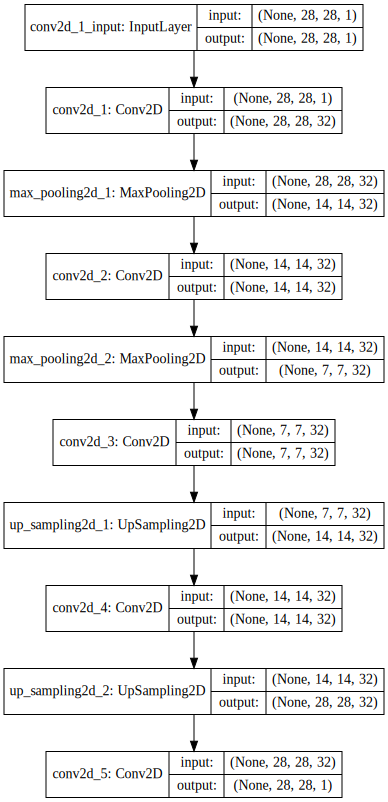

In [10]:
SVG(model_to_dot(auto_encoder,show_shapes=True).create(prog='dot',format='svg'))

In [11]:
auto_encoder.compile(optimizer='adam', loss='binary_crossentropy')

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [14]:
auto_encoder.fit(x_train,x_train,validation_data=(x_test,x_test),batch_size=128,epochs=1,shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 130s - loss: 0.0740 - val_loss: 0.0715


In [17]:
x_test_image=np.random.randint(x_test.shape[1],size=10)

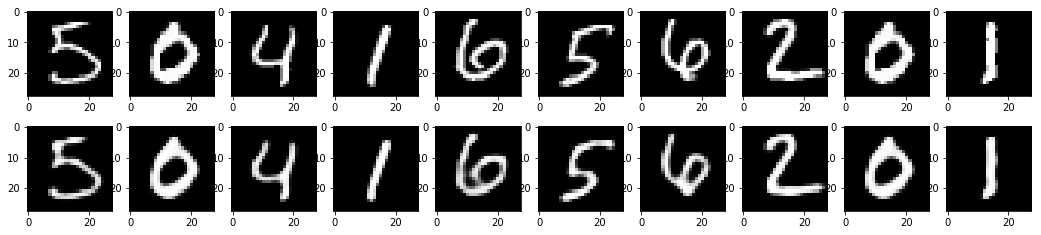

In [18]:
# decoded images
decond_img=auto_encoder.predict(x_test) 
import matplotlib.pyplot as plt

plt.figure(figsize=(18,6))
for i,images_test in enumerate(x_test_image):
    
    ax=plt.subplot(3,10,i+1)
    plt.imshow(x_test[images_test].reshape(28,28))
    plt.gray()
    
    
    ax=plt.subplot(3,10,10+i+1)
    plt.imshow(decond_img[images_test].reshape(28,28))
    plt.gray()
    
    